In [3]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
from datetime import datetime
import time
import winsound
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [4]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#zips two arrays into a tuple object
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #checks if the city isn't already on the list
    if city not in cities:
        cities.append(city)

len(cities)
        

615

In [1]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

NameError: name 'weather_api_key' is not defined

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
line = ("-"*25)
print(line)

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print(line)
print("Data Retrieval Complete      ")
print(line)

duration = 1000 #milliseconds
freq = 400 #hz
winsound.Beep(freq, duration)

Beginning Data Retrieval     
-------------------------
Processing Record 1 of Set 1 | egvekinot
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | vao
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | shimoda
Processing Record 7 of Set 1 | celestun
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | jagtial
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | tahoua
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | usiacuri
Processing Record 20 of Set 1 | wasilla
Processing Record 21 of Set 1 | awjilah
Processing Record 22 of Set 1 | riviere-au-renard
Proc

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Egvekinot,66.3167,-179.1667,45.23,52,85,10.69,RU,2022-07-21 23:29:45
1,Punta Arenas,-53.1500,-70.9167,32.11,93,20,20.71,CL,2022-07-21 23:28:44
2,Saldanha,-33.0117,17.9442,42.85,81,99,10.38,ZA,2022-07-21 23:29:45
3,Vao,-22.6667,167.4833,73.63,90,46,19.51,NC,2022-07-21 23:29:33
4,Qaanaaq,77.4840,-69.3632,43.75,91,100,10.49,GL,2022-07-21 23:29:46
5,Shimoda,34.6667,138.9500,84.56,85,7,10.63,JP,2022-07-21 23:26:50
6,Celestun,20.8667,-90.4000,85.01,72,3,17.02,MX,2022-07-21 23:29:46
7,Chokurdakh,70.6333,147.9167,53.56,35,0,8.86,RU,2022-07-21 23:29:47
8,Jagtial,18.8000,78.9333,76.48,88,100,4.99,IN,2022-07-21 23:29:47
9,Bluff,-46.6000,168.3333,43.81,81,90,8.12,NZ,2022-07-21 23:29:47


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

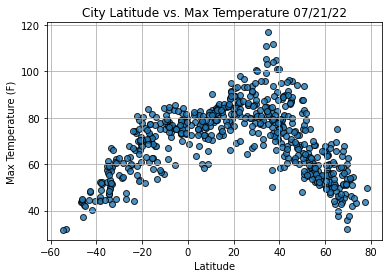

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


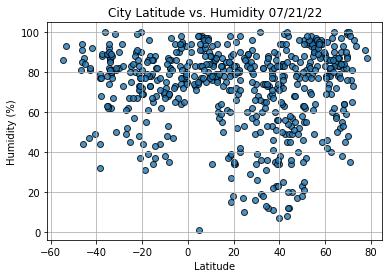

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")

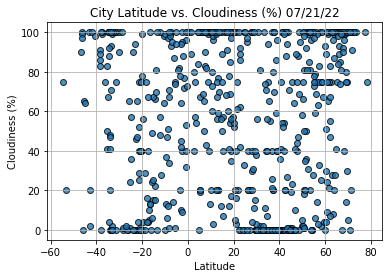

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

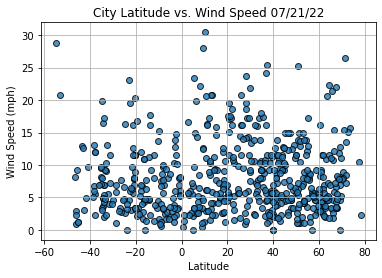

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

In [21]:
#index13 = city_data_df.loc(13)
#index13

In [22]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
581    False
582     True
583    False
584    False
585     True
Name: Lat, Length: 586, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Egvekinot,RU,2022-07-21 23:29:45,66.3167,-179.1667,45.23,52,85,10.69
4,Qaanaaq,GL,2022-07-21 23:29:46,77.4840,-69.3632,43.75,91,100,10.49
5,Shimoda,JP,2022-07-21 23:26:50,34.6667,138.9500,84.56,85,7,10.63
6,Celestun,MX,2022-07-21 23:29:46,20.8667,-90.4000,85.01,72,3,17.02
7,Chokurdakh,RU,2022-07-21 23:29:47,70.6333,147.9167,53.56,35,0,8.86


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

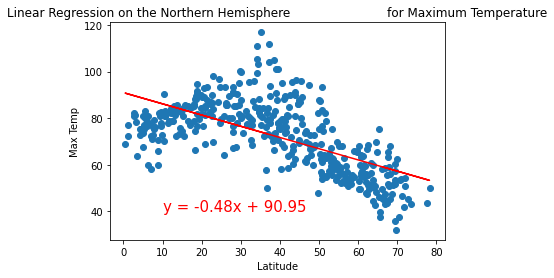

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

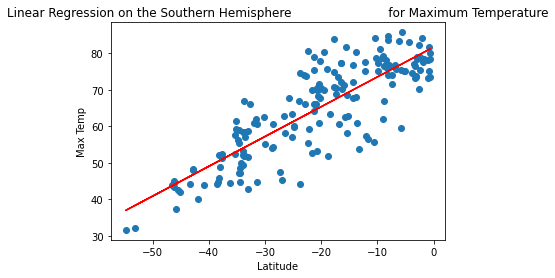

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10, 40))

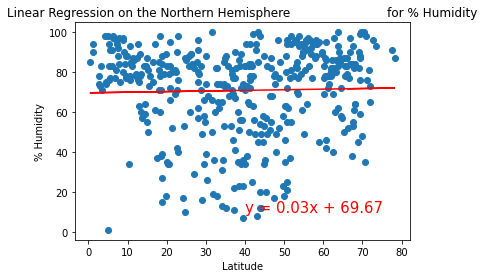

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

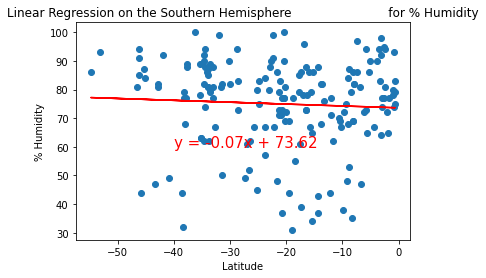

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40, 60))

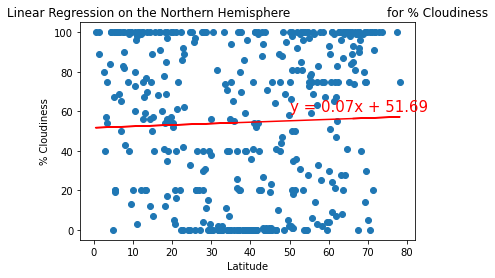

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,60))

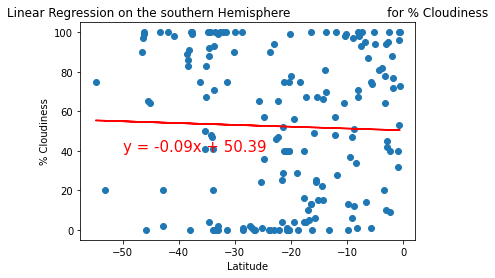

In [36]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,40))

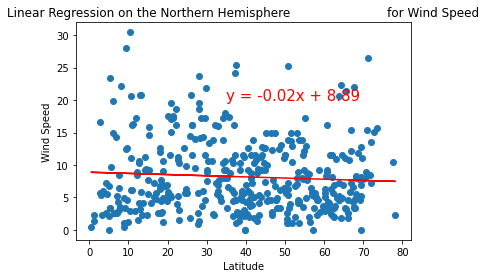

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(35, 20))

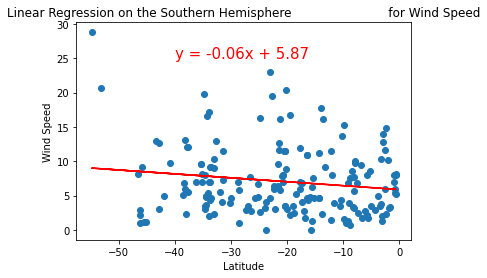

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,25))